In [2]:
import matplotlib.pyplot as plt
import re
import os
import sys

import numpy as np
from scipy.stats import norm
from settings_and_potential import *
font_size=35
lw=4

myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"

import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 
# nrank = sys.argv[0]
range_bins=[-3,3]
tau=0.1
s=1

In [3]:
#/////////////////////////////////////////
#// Anisotropique potential definition //
#////////////////////////////////////////
def U(x):
    res = np.log(s*(x*x-1)*(x*x-1))
    return res
#define DIVTERM          //define to use
m=5      # minimum step scale factor
M=1.5       # maximum step scale factor
dt=0.015     #artificial time stepsize
gamma=0.1         #friction coefficient
tau=0.1          #'temperature'
T=100
dt=0.05
numruns= int(T/dt)         #total number of trajectories
numsam=5  
r=0.01
nsnapshot=5


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


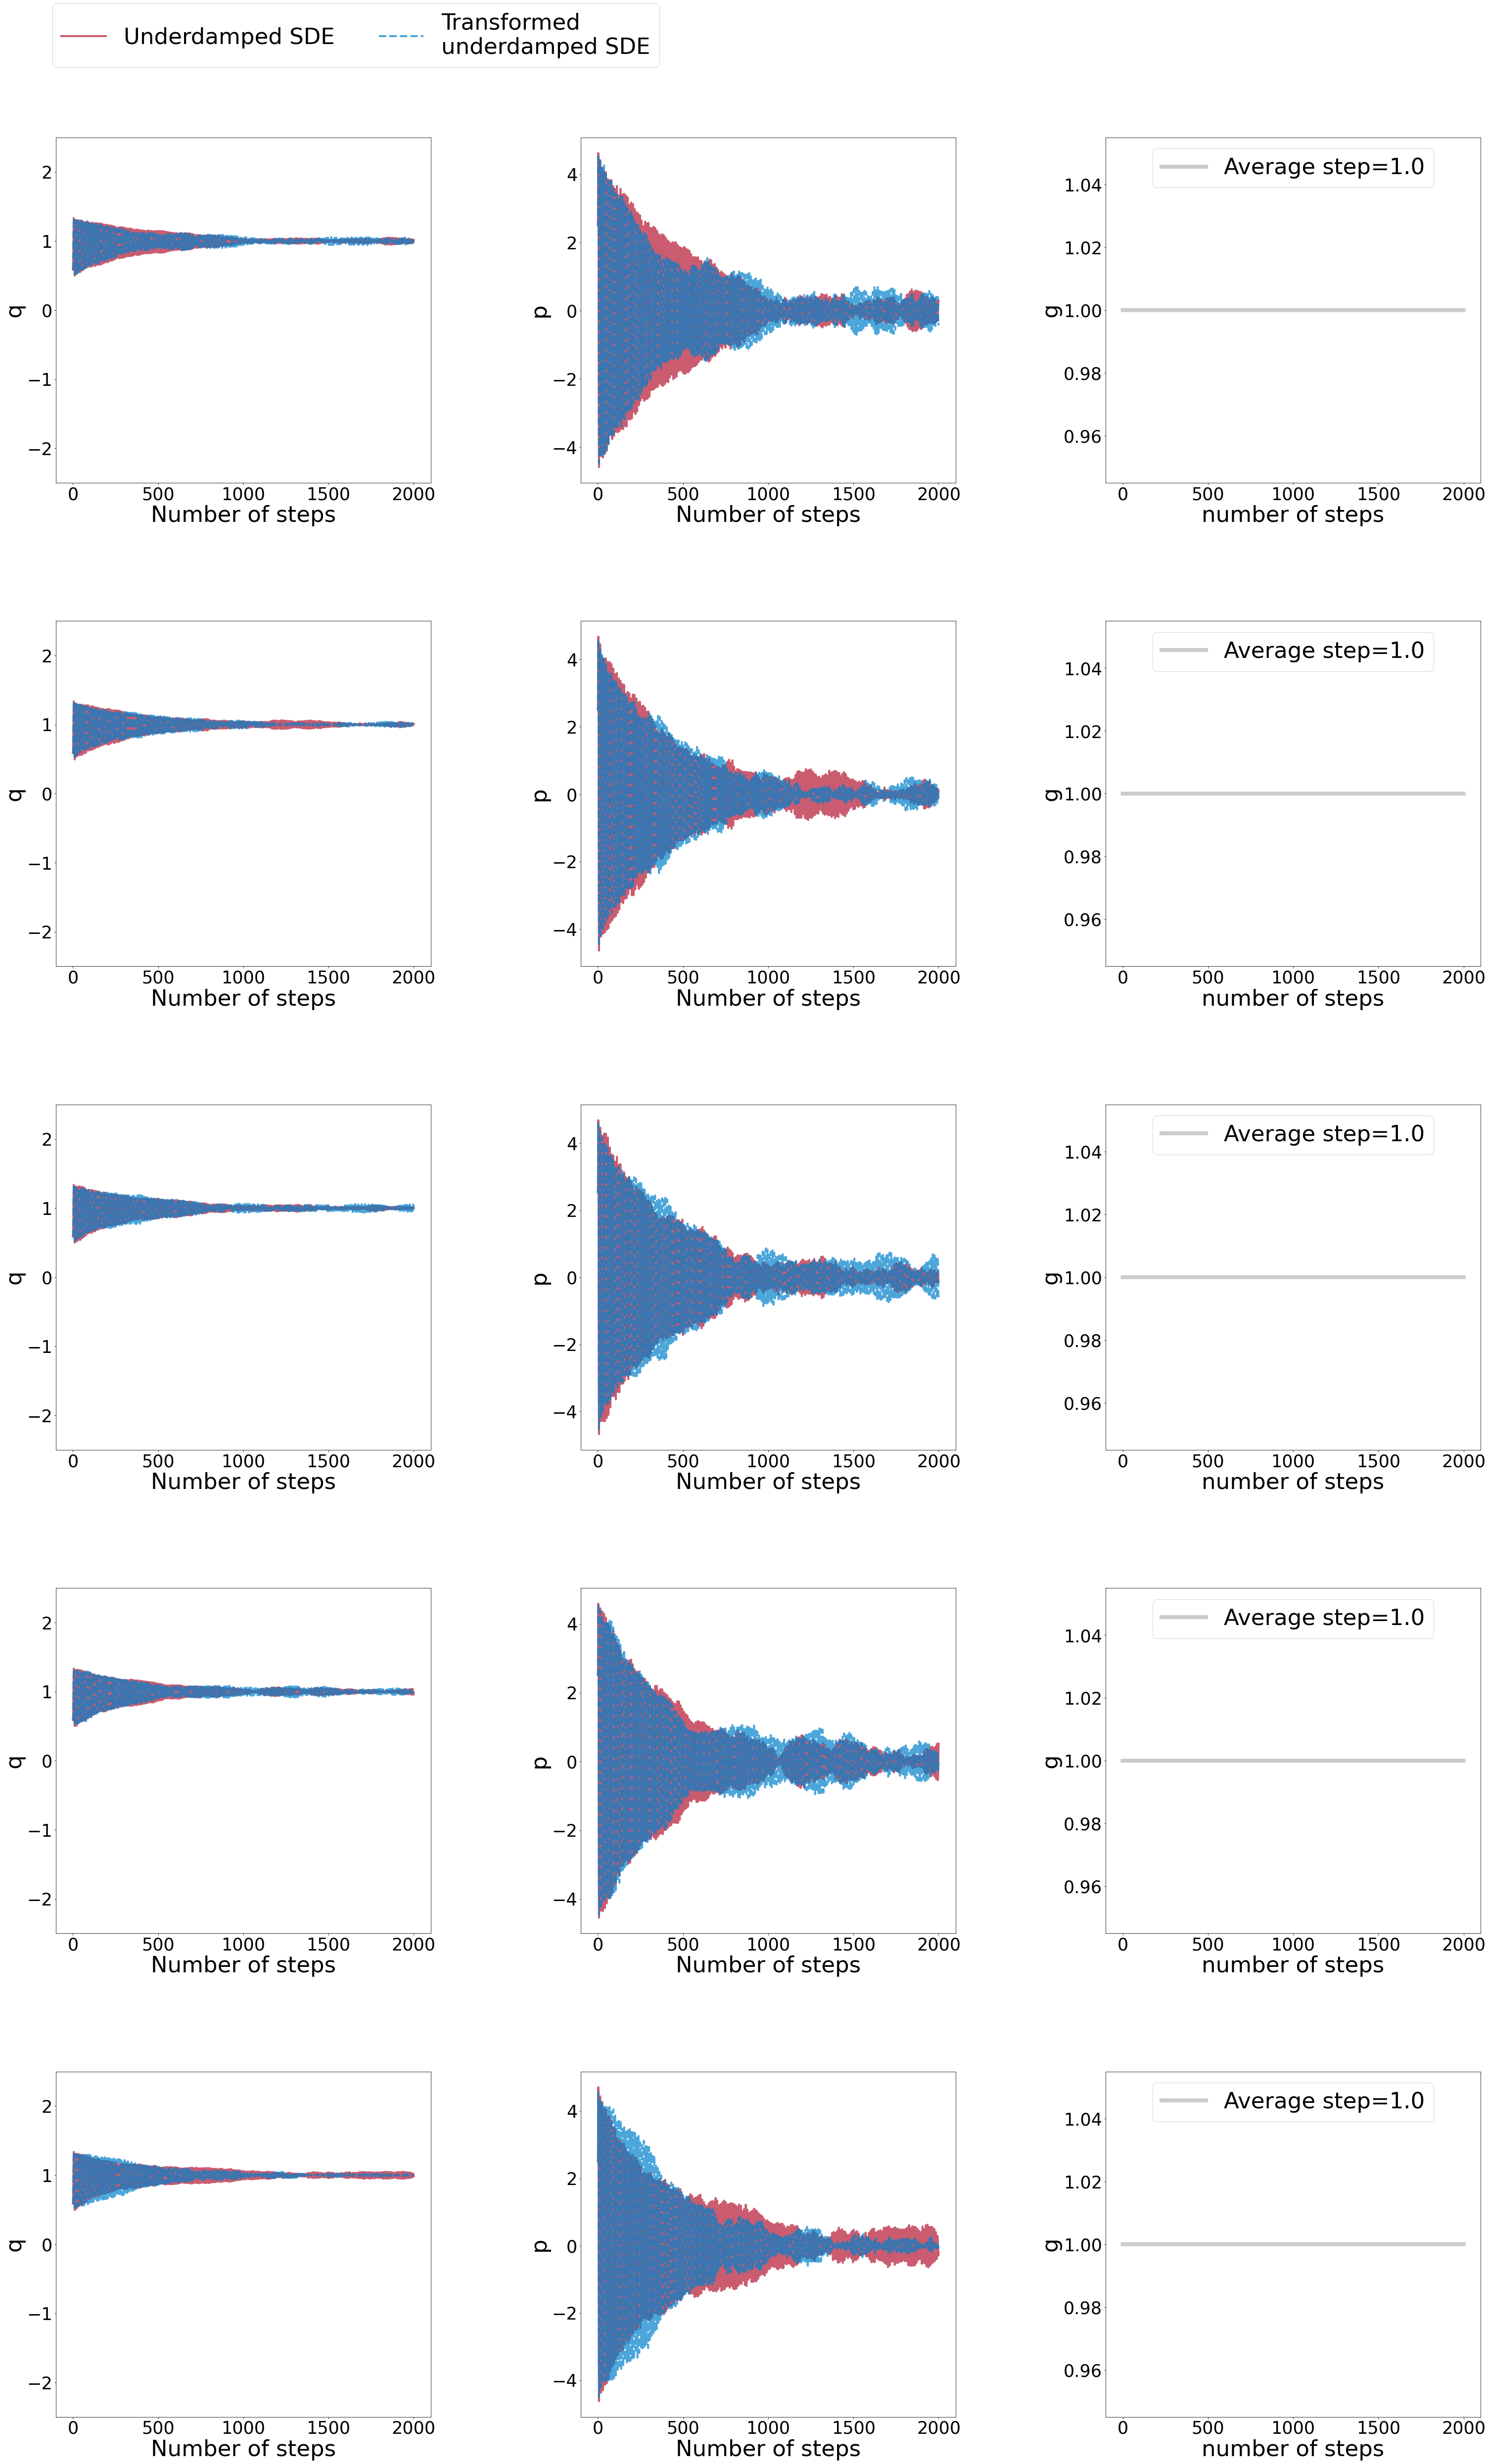

In [6]:
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/fewtraj")

fig, ((axs))= plt.subplots(numsam,3,figsize=(50,80))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=100
range_bins=[-3.,3.]
font_size=45

for i in range(numsam):
    filename= "vec_noada"+str(i)+".txt"
    q_noada,p_noada,g=openCfile_qp(filename)
    filename= "vec_tr"+str(i)+".txt"
    q_tr,p_tr,g=openCfile_qp(filename)

    t=np.linspace(0,numruns*dt+dt,numruns+1)
    t=np.linspace(0,numruns,numruns+1)

    # Q
    ###6
    axs[i,0].plot(t,q_noada,"-",linewidth=lw,label='Underdamped SDE',color=myred)
    axs[i,0].plot(t,q_tr,"--",linewidth=lw,alpha=0.7,label='Transformed\nunderdamped SDE',color=myblue)
    axs[i,0].set_ylim(-2.5,2.5)
    axs[i,0].set_ylabel("q", fontsize=font_size)
    axs[i,0].set_xlabel("Number of steps", fontsize=font_size)



    ############
    ## P vals ## 
    ############

    axs[i,1].plot(t,p_noada,"-",linewidth=lw,label='Underdamped SDE',color=myred)
    axs[i,1].plot(t,p_tr,"--",linewidth=lw,alpha=0.7,label='Transformed\nunderdamped SDE',color=myblue)
    axs[i,1].set_ylabel("p", fontsize=font_size)
    axs[i,1].set_xlabel("Number of steps", fontsize=font_size)

    ############
    ## Histograms g vals ## 
    ############
    range_bins_g=[0,M+0.1]
    histogram_g,bins = np.histogram(g,bins=nbins,range=range_bins_g, density=True)
    midx_noada = (bins[0:-1]+bins[1:])/2
    mean_g=round(np.mean(g),2)

    axs[i,2].plot(t,g,linewidth=lw*2,label='Average step='+str(mean_g),color=mygrey)
    axs[i,2].set_ylabel("g", fontsize=font_size)
    axs[i,2].set_xlabel("number of steps", fontsize=font_size)

    axs[i,2].legend(fontsize=font_size, loc="upper center")

axs[0,0].legend(fontsize=font_size,loc="upper center",ncol=3,bbox_to_anchor=(0.8, 1.42))

os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/underdamped/visualisation")
fig.savefig("figure/chains_anisotropic_under.eps",dpi=1000)
fig.savefig("figure/chains_anisotropic_under.pdf")


## Conservation of the energy

Certain observable should be conserved and this allows us to see whether the method is implemented properly 

$$
H(p,q)=p^2/2+V(q)
$$

In [21]:
s=20

def V(x):
    res = (x*x-1)*(x*x-1)*s
    return res

def H(p,q):
    res = V(q)+p*p/2
    return res




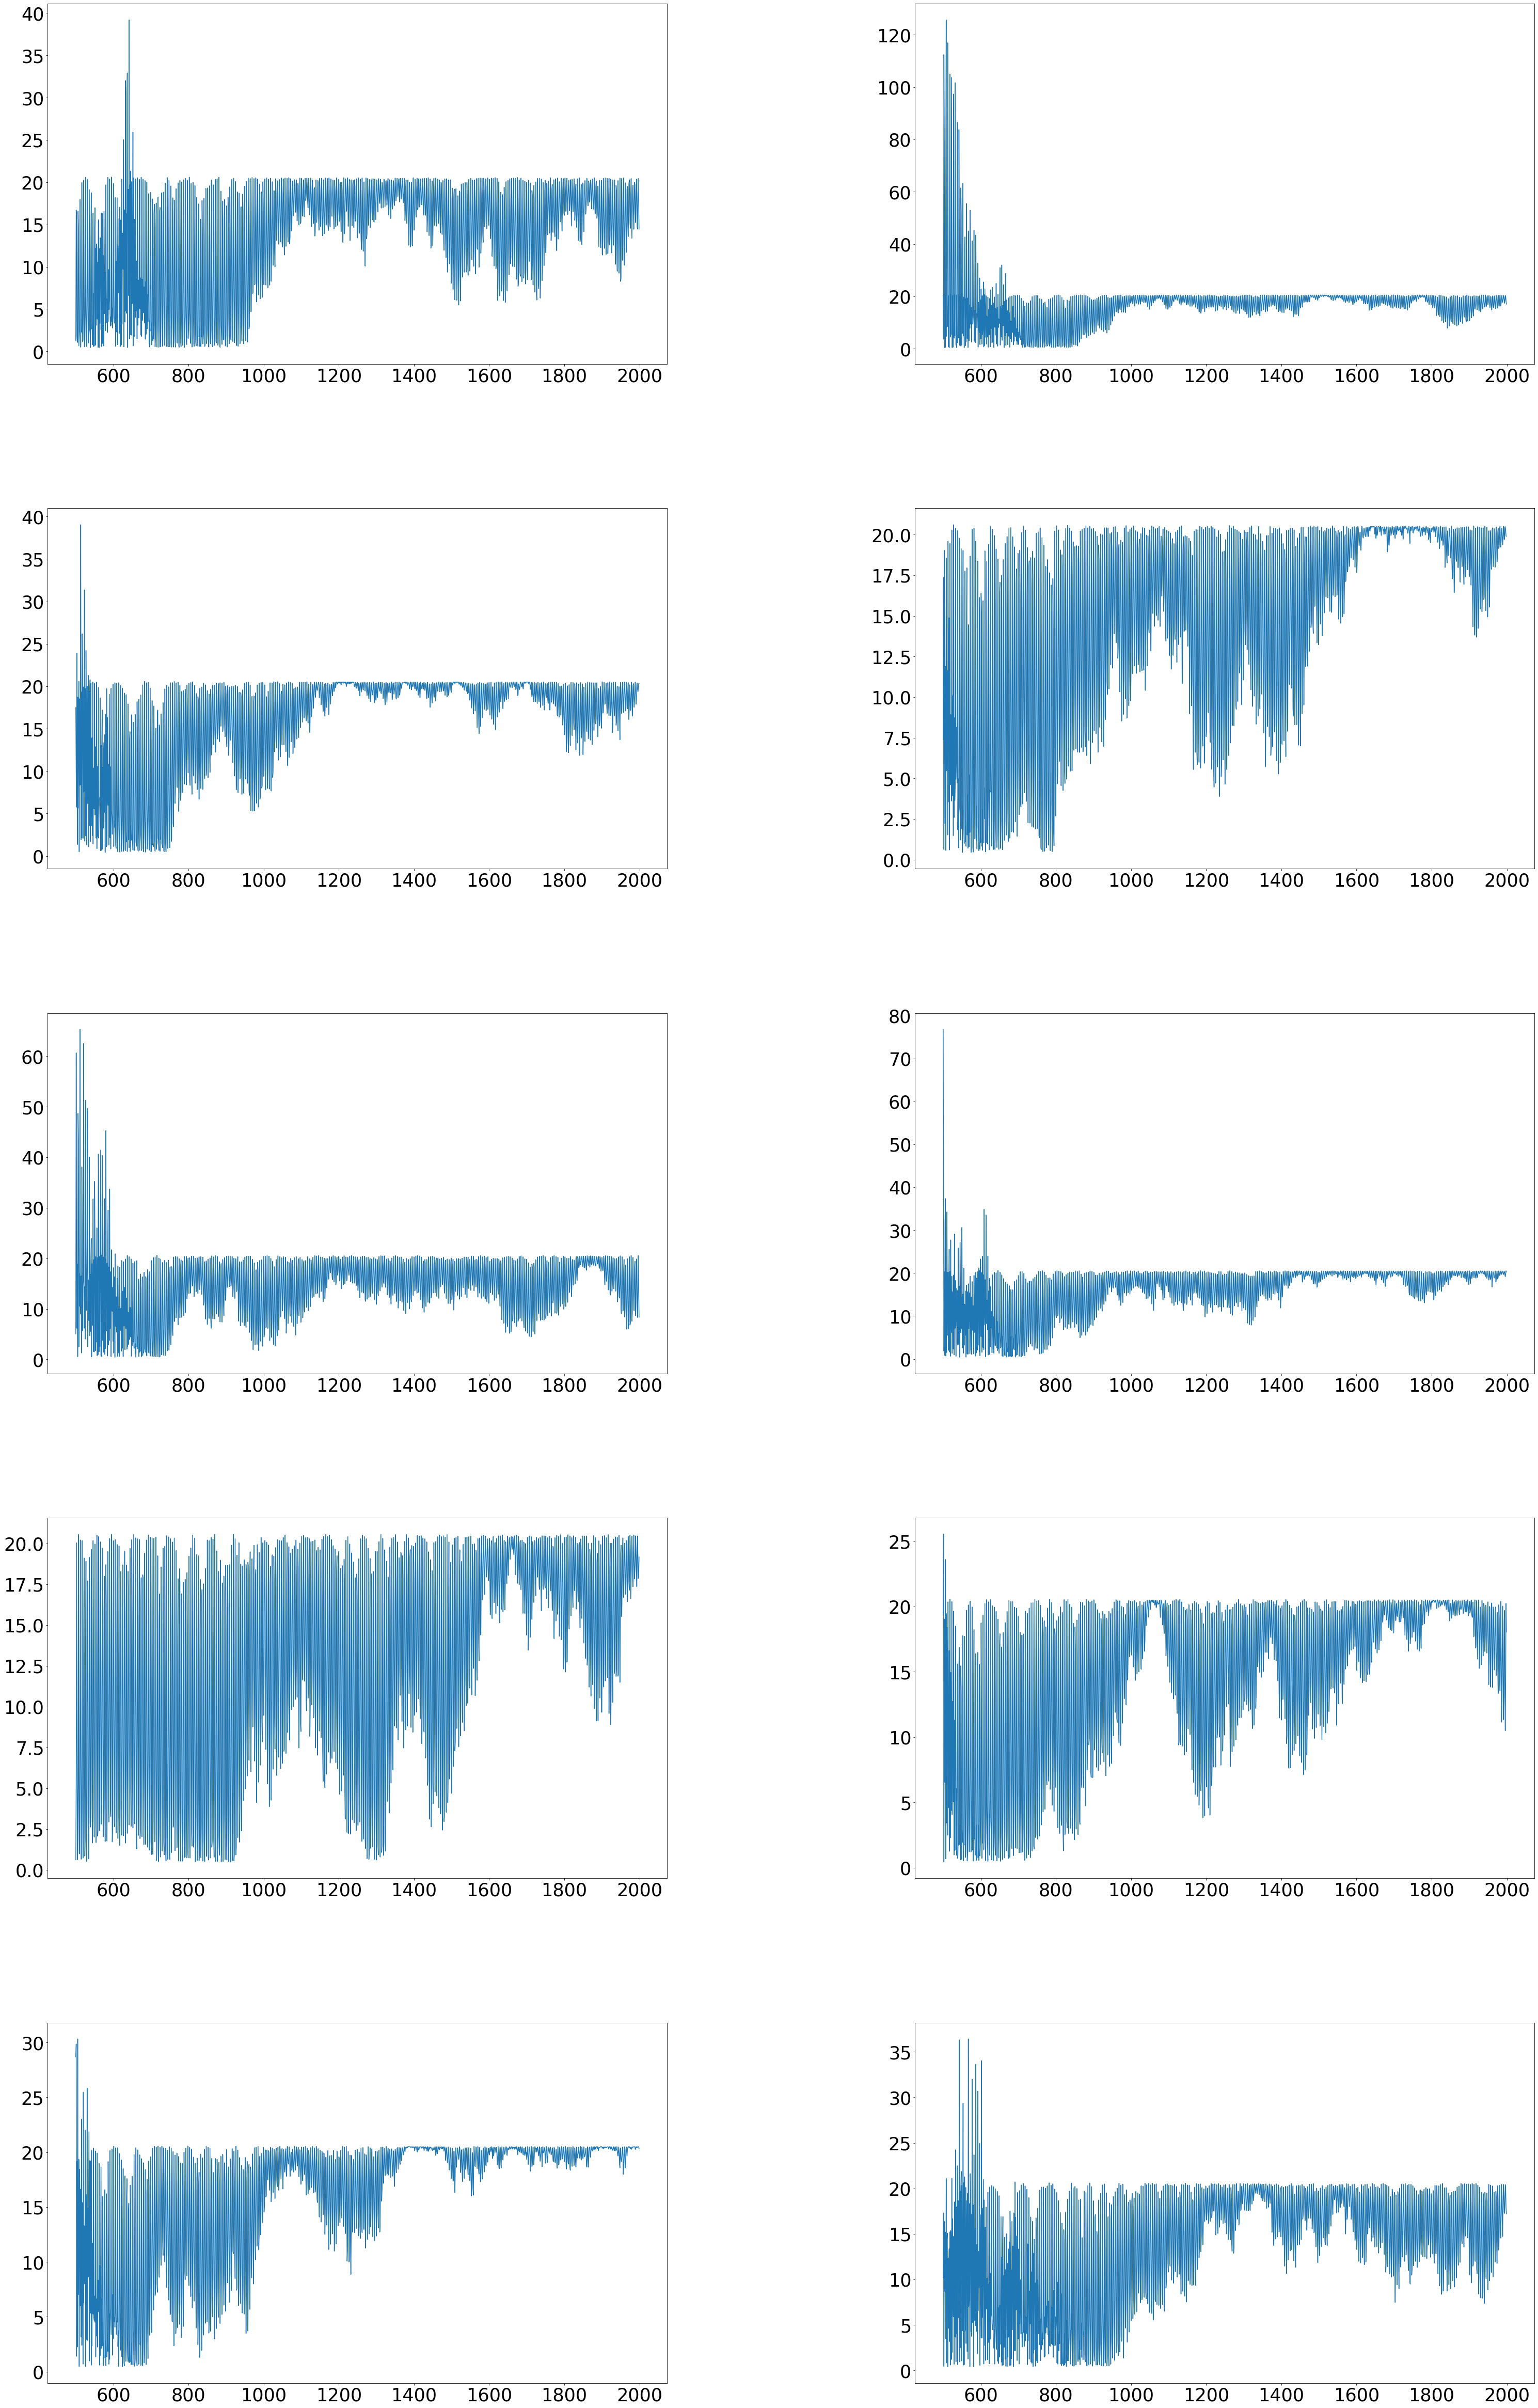

In [22]:
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/fewtraj")

fig, ((axs))= plt.subplots(numsam,2,figsize=(50,80))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=100
range_bins=[-3.,3.]
font_size=45

for i in range(numsam):
    filename= "vec_noada"+str(i)+".txt"
    q_noada,p_noada,g=openCfile_qp(filename)
    filename= "vec_tr"+str(i)+".txt"
    q_tr,p_tr,g=openCfile_qp(filename)

    t=np.linspace(0,numruns*dt+dt,numruns+1)
    t=np.linspace(0,numruns,numruns+1)

    axs[i,0].plot(t[500:-1],H(q_tr,p_tr)[500:-1])
    axs[i,1].plot(t[500:-1],H(q_noada,p_noada)[500:-1])
